# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$






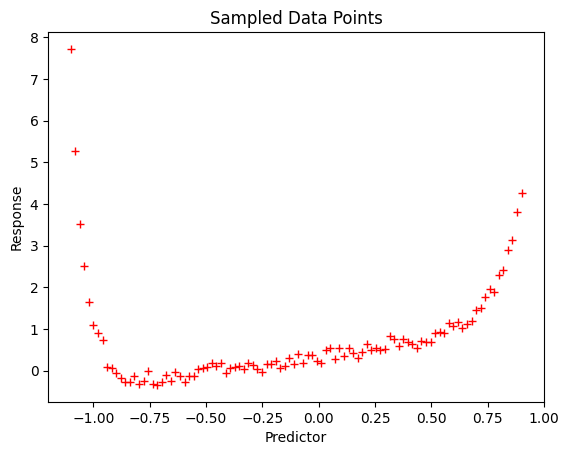

In [2]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y,coeff

predictor, response,coeff = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

#### Fitting a line to the curve

In [3]:
# Libraries Here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [4]:
class Linear_Regression:

    def __init__(self, lr = 0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples=X.shape[0]
        n_features=X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    
    def mse(self,y_test, y_pred):
        return np.mean((y_test - y_pred)**2)

In [5]:
X,Y,coeff= gen_data()
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

regressor = Linear_Regression()
regressor.fit(X, Y)
predictions = regressor.predict(X)

mse_val_train = regressor.mse(Y, predictions)
print("MSE Error:", mse_val_train)



MSE Error: 0.3659130299851638


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


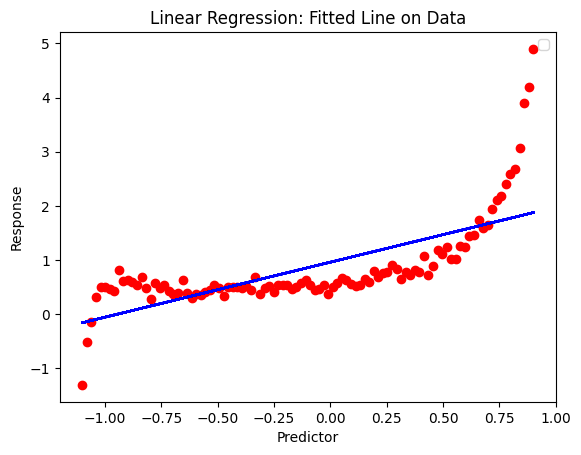

In [6]:
plt.scatter(X, Y, color='r')

# Plot the fitted line
plt.plot(X, predictions, color='b')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression: Fitted Line on Data')
plt.legend()
plt.show()


In [7]:
# use inbuilt linear regression technique
regressor = LinearRegression()
regressor.fit(X, Y)
predictions = regressor.predict(X)
mse_val = mean_squared_error(Y, predictions)
print("MSE:", mse_val)

MSE: 0.36549796430694587


2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

In [9]:
class PolynomailRegression() :
	
	def __init__( self, degree, learning_rate, iterations ) :
		self.degree = degree
		self.learning_rate = learning_rate
		self.iterations = iterations
		
	# function to transform X
	def transform( self, X ) :		
		X_transform = np.ones( ( X.shape[0], 1 ) )
		j = 0
		for j in range( self.degree + 1 ) :	
			if j != 0 :
				x_pow = np.power( X, j )				
				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
		return X_transform 
		
	def normalize( self, X ) :
		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
		return X
		
	# model training
	
	def fit( self, X, Y ) :
		self.X = X
		self.Y = Y
		self.m, self.n = self.X.shape
	
		# weight initialization
		self.W = np.zeros( self.degree + 1 )
		# transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( self.X )
		X_normalize = self.normalize( X_transform )
		for i in range( self.iterations ) :	
			h = self.predict( self.X )
			error = h - self.Y
			self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error ) 
		return self
	
	def predict( self, X ) :		
		X_transform = self.transform( X )
		# print("X_transform",X_transform.shape)
		X_normalize = self.normalize( X_transform )
		# print("X_normalize",X_normalize.shape)
		return np.dot( X_normalize, self.W )

	def get_coefficients(self):
         return self.W.copy()
	
	def mse_value(self, y_test, y_pred):
		 return np.mean((y_test - y_pred)**2)
	
	




#### Finding best degree on overall data

In [10]:
X, Y,coeff = gen_data()
X = X.reshape(-1, 1)

min_degree = 1
max_degree = 25

best_degree = None
min_mse = float('inf')

for degree in range(min_degree, max_degree + 1):
    model = PolynomailRegression(degree=degree, learning_rate=0.01, iterations=1000)
    model.fit(X, Y)
    Y_pred = model.predict(X)
    mse_value = model.mse_value(Y, Y_pred)
    print(f"Degree: {degree}, MSE: {mse_value}")

    if mse_value < min_mse:
        min_mse = mse_value
        best_degree = degree

print(f"Best Degree: {best_degree}, Min MSE: {min_mse}")


Degree: 1, MSE: 2.6747102079348277
Degree: 2, MSE: 1.5256885045832709
Degree: 3, MSE: 1.4337473920996038
Degree: 4, MSE: 0.9285238542252264
Degree: 5, MSE: 0.8392979229766532
Degree: 6, MSE: 0.55493188794702
Degree: 7, MSE: 0.48822353656695056
Degree: 8, MSE: 0.3376891119240977
Degree: 9, MSE: 0.28569821272100565
Degree: 10, MSE: 0.20030118974978628
Degree: 11, MSE: 0.16422064277314308
Degree: 12, MSE: 0.11537361432609405
Degree: 13, MSE: 0.09296243841840074
Degree: 14, MSE: 0.06583372163675257
Degree: 15, MSE: 0.053125243613821815
Degree: 16, MSE: 0.038726055899931805
Degree: 17, MSE: 0.032111144312050095
Degree: 18, MSE: 0.024900528820511535
Degree: 19, MSE: 0.021789590785504066
Degree: 20, MSE: 0.01846168216096679
Degree: 21, MSE: 0.017218700678284675
Degree: 22, MSE: 0.015882042777877133
Degree: 23, MSE: 0.015555154586968935
Degree: 24, MSE: 0.015171208700204011
Degree: 25, MSE: 0.015240342680212824
Best Degree: 24, Min MSE: 0.015171208700204011


#### Using Best Degree on overall data

MSE Error: 0.026182328855726994


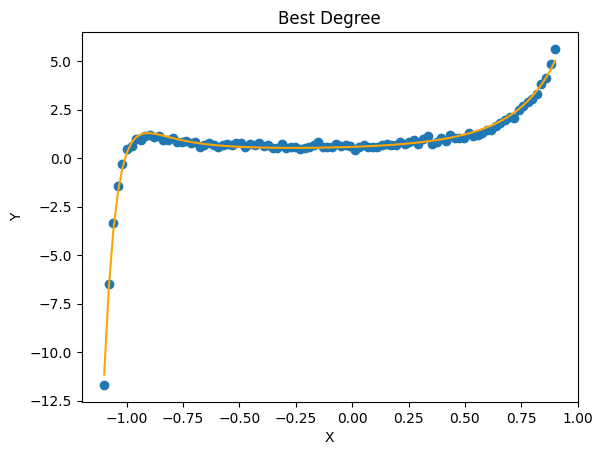

In [13]:
# comment degree 25 on the graph
X,Y,coeff= gen_data()
X = X.reshape(-1,1)
model = PolynomailRegression( degree = best_degree, learning_rate = 0.01, iterations = 1000 )

model.fit( X, Y )
Y_pred = model.predict( X ) 
mse= model.mse_value(Y, Y_pred)
print("MSE Error:", mse)
plt.scatter( X, Y,  )
plt.plot( X, Y_pred, color = 'orange' ) 
plt.title( 'Best Degree' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()

#### Using Model with Degree 13 on overall data

MSE Error: 0.21118609195989904


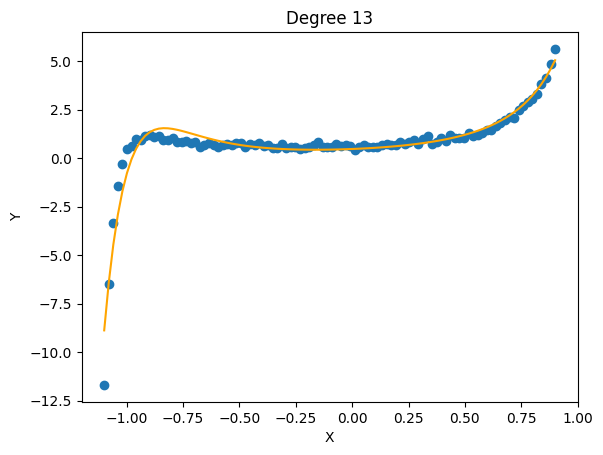

In [14]:
model = PolynomailRegression( degree = 13, learning_rate = 0.01, iterations = 1000 )
model.fit( X, Y )
Y_pred = model.predict( X ) 
mse= model.mse_value(Y, Y_pred)
print("MSE Error:", mse)
plt.scatter( X, Y,  )
plt.plot( X, Y_pred, color = 'orange' ) 
plt.title( 'Degree 13' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

In [26]:
class PolynomialRegression_Regularisation:

    def __init__(self, degree, learning_rate, regularisation=None, iterations=500, alpha=0.01):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularisation = regularisation
        self.alpha = alpha

    def transform(self, X):
        X_transform = np.ones((X.shape[0], 1))
        for j in range(1, self.degree + 1):
            x_pow = np.power(X, j)
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)
        return X_transform

    def normalize(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        return X

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape

        # weight initialization
        self.W = np.zeros(self.degree + 1)
        
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(self.X)
        X_normalize = self.normalize(X_transform)
        
        for i in range(self.iterations):
            h = self.predict(self.X)
            error = h - self.Y
            
            regularisation_term = 0
            if self.regularisation == "l1":
                # print("l1")
                regularisation_term = self.alpha * np.sign(self.W)
            elif self.regularisation == "l2":
                # print("l2")
                regularisation_term = 2 * self.alpha * self.W
            else:
                # print("none")
                regularisation_term = 0
                
            self.W = self.W - ((self.learning_rate) * (1 / self.m) * (np.dot(X_normalize.T, error) + regularisation_term))

        return self

    def predict(self, X):
        X_transform = self.transform(X)
        X_normalize = self.normalize(X_transform)
        return np.dot(X_normalize, self.W)

    def get_coefficients(self):
        return self.W.copy()
    
    def mse_value(self, y_test, y_pred):
        return np.mean((y_test - y_pred)**2)


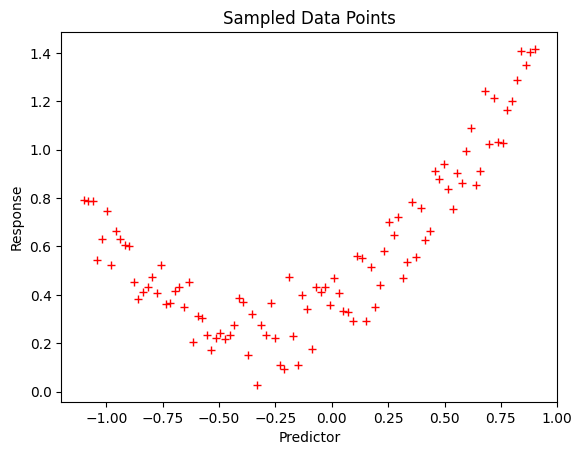

In [27]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

MSE: 0.010482885900507383


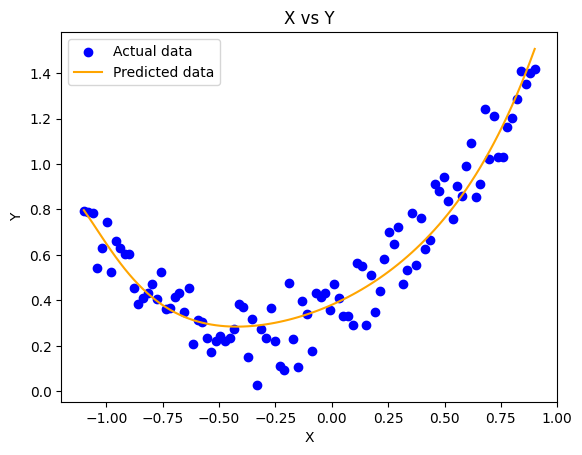

In [31]:
model = PolynomialRegression_Regularisation(degree=12, learning_rate=0.01, iterations=1000, regularisation="None", alpha=0.1)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MSE: 0.01049891690886277


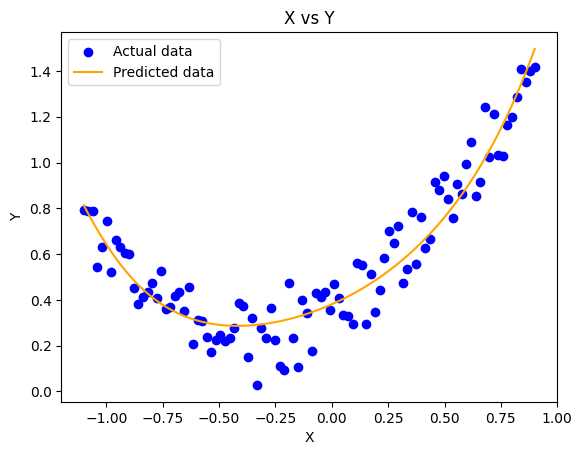

In [34]:
# using l1 regularisation
model = PolynomialRegression_Regularisation(degree=11, learning_rate=0.01, iterations=1000, regularisation="l1", alpha=0.1)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MSE: 0.010587586524687465


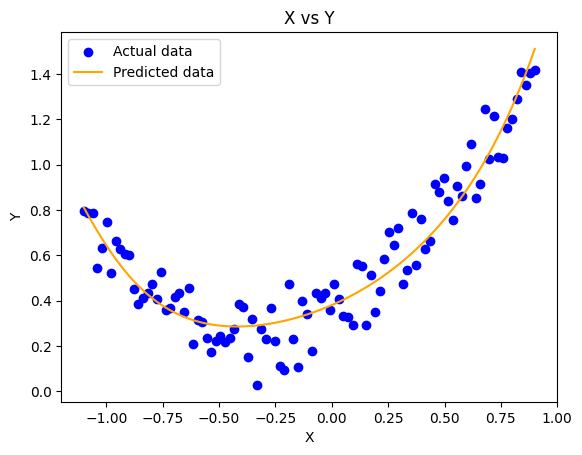

In [35]:
# using l1 regularisation
model = PolynomialRegression_Regularisation(degree=11, learning_rate=0.01, iterations=1000, regularisation="l2", alpha=0.1)
model.fit(X, response_low)
Y_pred = model.predict(X)

# Calculate and print MSE
mse_value = model.mse_value(response_low, Y_pred)
print("MSE:", mse_value)

# Plotting
plt.scatter(X, response_low, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='orange', label='Predicted data')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [36]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [37]:
class MultipleLinearRegression() :
        
        def __init__( self, learning_rate, iterations ) :
            self.learning_rate = learning_rate
            self.iterations = iterations
        
        def costFunction( self, X, Y, W,B ) :
            m = len( Y )
            J = np.sum( ( (X.dot( W )+ B) - Y ) ** 2 ) / ( 2 * m )
            return J
        
        def GradientDescent(self,x,y,w,b):
            cost_lists = []
            m = len(y)
            for i in range(self.iterations):
                h = np.dot(x,w) + b
                loss = h - y
                gradient = np.dot(x.T,loss) / m
                w = w - self.learning_rate * gradient
                b = b - self.learning_rate * np.mean(loss)
                cost = self.costFunction(x,y,w,b)
                cost_lists.append(cost)
            return w,b,cost_lists
        
        def Predict(self,x,w,b):
            return np.dot(x,w) + b
        
        # Calculating the r² accuracy of our model
        def r2score(self,y_pred, y):
            rss = np.sum((y_pred - y) ** 2)
            tss = np.sum((y-y.mean()) ** 2)
            r2 = 1 - (rss / tss)
            return r2
        
        def error(self,y_pred,y):
            return np.mean(np.abs(y_pred - y)**2)
    

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
df = pd.read_csv('credit.csv')
x = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']
# print(x.shape)
# # print first five row of X
# print(x[:5])
# print(y[:5])
# print(y.shape)

In [40]:
sc = StandardScaler()
x = sc.fit_transform(x)

# print(x.shape)
# print(x[:5])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
print(Xtrain.shape)
print(Xtest.shape)


(320, 6)
(80, 6)


[-263.86381978  307.99059498  296.54847928   16.92613008  -13.44341566
   12.03140827]
17205.225474256942
0.9205450676658895


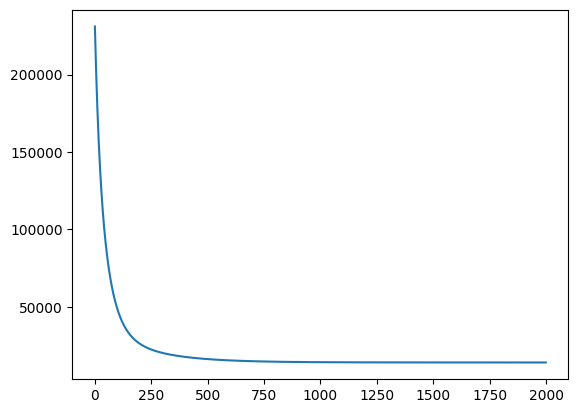

In [41]:
model = MultipleLinearRegression( learning_rate = 0.01, iterations = 2000 )
w,b,c= model.GradientDescent(Xtrain,ytrain,np.zeros(Xtrain.shape[1]),0)
plt.plot(c)
print(w)
y_pred = model.Predict(Xtest,w,b)
r2 = model.r2score(y_pred, ytest)
error = model.error(y_pred, ytest)
print(error)
print(r2)


In [42]:
# After running your gradient descent
print("Coefficients:", w)
print("Intercept:", b)

# Find the absolute values of the coefficients for easier interpretation
abs_coefficients = np.abs(w)

# Sort the coefficients and corresponding variable names
sorted_coefficients = sorted(zip(abs_coefficients, ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']), key=lambda x: x[0], reverse=True)

# Print the sorted coefficients and variable names
for coefficient, variable in sorted_coefficients:
    print(f"{variable}: {coefficient}")


Coefficients: [-263.86381978  307.99059498  296.54847928   16.92613008  -13.44341566
   12.03140827]
Intercept: 525.7933111527573
Limit: 307.9905949797232
Rating: 296.54847928303275
Income: 263.86381978084313
Cards: 16.92613008014891
Age: 13.443415655763333
Education: 12.031408272830555


From the weights obtained we see that Limit , Rating have the highest weights and hence are the most important features in predicting the balance. The other features have very low weights and hence can be discarded.

In [43]:
df = pd.read_csv('credit.csv')
df['Rating_Age_Interaction'] = df['Rating'] * df['Age']

x = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age_Interaction']]
y = df['Balance']
print(x.shape)
# # print first five row of X
# print(x[:5])
# print(y[:5])
# print(y.shape)


(400, 7)


In [44]:
sc = StandardScaler()
x = sc.fit_transform(x)
# print(x.shape)
# print(x[:5])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1234)
print(Xtrain.shape)
print(Xtest.shape)


(320, 7)
(80, 7)


[-262.94389489  288.65082462  275.32076799   17.45106342  -41.50082038
   12.23942725   51.82312941]
17156.14967401001
0.9207717031374034


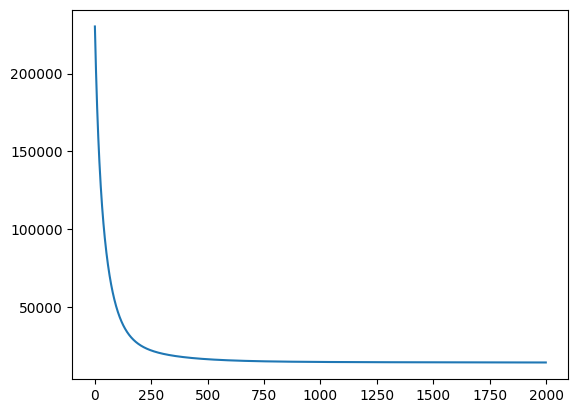

In [45]:
model = MultipleLinearRegression( learning_rate = 0.01, iterations = 2000 )
w,b,c= model.GradientDescent(Xtrain,ytrain,np.zeros(Xtrain.shape[1]),0)
plt.plot(c)
print(w)
y_pred = model.Predict(Xtest,w,b)
r2 = model.r2score(y_pred, ytest)
error = model.error(y_pred, ytest)   
print(error)
print(r2)


In [46]:
# After running your gradient descent
print("Coefficients:", w)
print("Intercept:", b)

# Find the absolute values of the coefficients for easier interpretation
abs_coefficients = np.abs(w)

# Sort the coefficients and corresponding variable names
sorted_coefficients = sorted(zip(abs_coefficients, ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education','Rating_Age_Interaction']), key=lambda x: x[0], reverse=True)

# Print the sorted coefficients and variable names
for coefficient, variable in sorted_coefficients:
    print(f"{variable}: {coefficient}")


Coefficients: [-262.94389489  288.65082462  275.32076799   17.45106342  -41.50082038
   12.23942725   51.82312941]
Intercept: 526.2218207059844
Limit: 288.6508246235682
Rating: 275.32076799259573
Income: 262.9438948881171
Rating_Age_Interaction: 51.82312940641921
Age: 41.50082038291426
Cards: 17.45106342184323
Education: 12.239427249262917


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [47]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


### WITH ICECREAM

In [57]:
df = pd.read_csv('shark_attacks.csv')
# y is the sharkAttacks one 'sharkAttack' extract 
x = df.drop('SharkAttacks', axis=1)
y=df['SharkAttacks']
print(x.shape)
print(y.shape)

(84, 4)
(84,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x.shape)
print(x[:5])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)


(84, 4)
[[-1.5        -1.59325501 -1.7040597  -0.91310146]
 [-1.5        -1.30357228 -0.88073267 -0.68795315]
 [-1.5        -1.01388955 -0.3817466   0.21264007]
 [-1.5        -0.72420682 -0.05740565  0.51283781]
 [-1.5        -0.43452409  0.16713809  1.11323329]]
(67, 4)
(17, 4)


[-0.01690057  1.84867084  4.24408751  2.25217731]
37.74403367836123
0.4991263783154378


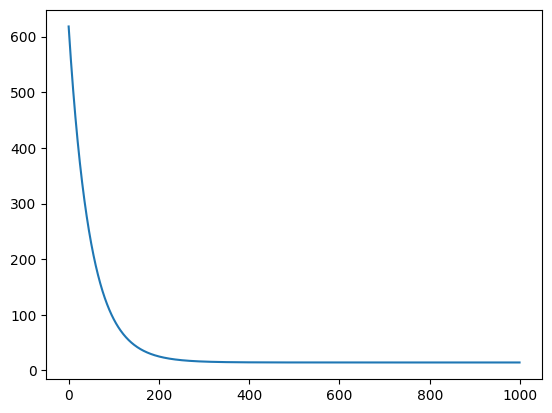

In [54]:
model = MultipleLinearRegression(learning_rate=0.01, iterations=1000)
w,b,c= model.GradientDescent(Xtrain,ytrain,np.zeros(Xtrain.shape[1]),0)
plt.plot(c)
print(w)
y_pred = model.Predict(Xtest,w,b)
# get the accuracy
r2 = model.r2score(y_pred, ytest)
error = model.error(y_pred, ytest)
print(error)
print(r2)


## WITHOUT ICECREAM

In [59]:
import pandas as pd

# Assuming you have a DataFrame 'df'
df = pd.read_csv('shark_attacks.csv')

# Drop both 'SharkAttacks' and 'IceCreamSales' columns
x = df.drop(['SharkAttacks', 'IceCreamSales'], axis=1)
y = df['SharkAttacks']

print(x.shape)
print(y.shape)


(84, 3)
(84,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x.shape)
print(x[:5])
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)


(84, 3)
[[-1.5        -1.59325501 -1.7040597 ]
 [-1.5        -1.30357228 -0.88073267]
 [-1.5        -1.01388955 -0.3817466 ]
 [-1.5        -0.72420682 -0.05740565]
 [-1.5        -0.43452409  0.16713809]]
(67, 3)
(17, 3)


[-0.07429582  0.86920127  5.70556242]
43.354854582341495
0.42466925455520743


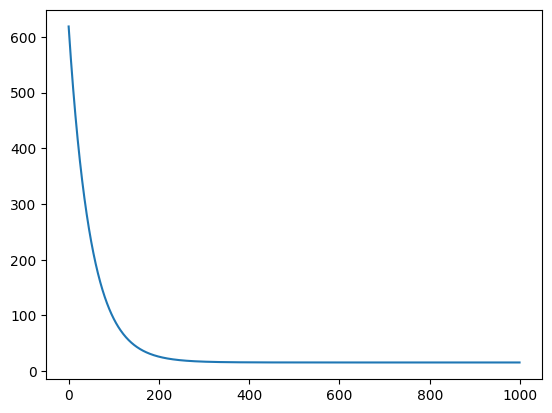

In [61]:
model = MultipleLinearRegression(learning_rate=0.01, iterations=1000)
w,b,c= model.GradientDescent(Xtrain,ytrain,np.zeros(Xtrain.shape[1]),0)
plt.plot(c)
print(w)
y_pred = model.Predict(Xtest,w,b)
# get the accuracy
r2 = model.r2score(y_pred, ytest)
error = model.error(y_pred, ytest)
print(error)
print(r2)
